In [1]:
import numpy as np
import pandas as pd

pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

## Step 1: Load and Inspect the Denormalized Dataset

In [2]:
file_path = "/content/cleaned_dataset.csv"

In [3]:

df = pd.read_csv(file_path)
df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,product_id,seller_id,shipping_limit_date,price,freight_value,payment_type,payment_installments,payment_value,review_id,review_score,review,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,seller_zip_code_prefix,seller_city,seller_state,price_capped,review_score_capped,product_volume_cm3,price_log,total_sales,delivery_delay_days,order_year,order_month,order_day,order_date,order_weekday,is_weekend,order_item_count,avg_price_per_item
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:00,2017-10-02 11:07:00,2017-10-04 19:55:00,2017-10-10 21:25:00,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:00,29.99,8.72,credit_card,1,18.12,a54f0611adc9ed256b57ede6b6eb5114,4.0,"Excellent quality t-shirts, they feel like the...",utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,7c396fd4830fd04220f754e42b4e5bff,3149.0,sao paulo,SP,9350.0,maua,SP,29.99,4.0,1976.0,3.44967,38.71,-8,2017,10,2,02-10-2017 10:56,0,0,3,9.996667
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:00,2017-10-02 11:07:00,2017-10-04 19:55:00,2017-10-10 21:25:00,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:00,29.99,8.72,voucher,1,2.00,a54f0611adc9ed256b57ede6b6eb5114,4.0,"Excellent quality t-shirts, they feel like the...",utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,7c396fd4830fd04220f754e42b4e5bff,3149.0,sao paulo,SP,9350.0,maua,SP,29.99,4.0,1976.0,3.44967,38.71,-8,2017,10,2,02-10-2017 10:56,0,0,3,9.996667
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:00,2017-10-02 11:07:00,2017-10-04 19:55:00,2017-10-10 21:25:00,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:00,29.99,8.72,voucher,1,18.59,a54f0611adc9ed256b57ede6b6eb5114,4.0,"Excellent quality t-shirts, they feel like the...",utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,7c396fd4830fd04220f754e42b4e5bff,3149.0,sao paulo,SP,9350.0,maua,SP,29.99,4.0,1976.0,3.44967,38.71,-8,2017,10,2,02-10-2017 10:56,0,0,3,9.996667
3,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:00,2017-08-15 20:05:00,2017-08-17 15:28:00,2017-08-18 14:44:00,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-08-21 20:05:00,29.99,7.78,credit_card,3,37.77,b46f1e34512b0f4c74a72398b03ca788,4.0,Great quality and fast delivery! Love the sele...,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,3a51803cc0d012c3b5dc8b7528cb05f7,3366.0,sao paulo,SP,9350.0,maua,SP,29.99,4.0,1976.0,3.44967,37.77,-10,2017,8,15,15-08-2017 18:29,1,0,1,29.990000
4,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:00,2017-08-02 18:43:00,2017-08-04 17:35:00,2017-08-07 18:30:00,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-08-08 18:37:00,29.99,7.78,credit_card,1,37.77,dc90f19c2806f1abba9e72ad3c350073,5.0,Website is easy to navigate for browsing and o...,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,ef0996a1a279c26e7ecbd737be23d235,2290.0,sao paulo,SP,9350.0,maua,SP,29.99,5.0,1976.0,3.44967,37.77,-8,2017,8,2,02-08-2017 18:24,2,0,1,29.990000


In [4]:
# Shape of the dataset
print("Rows:", df.shape[0], "Columns:", df.shape[1])

Rows: 110924 Columns: 47


In [5]:
# Check column names
print("Columns:", df.columns.tolist())

Columns: ['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'product_id', 'seller_id', 'shipping_limit_date', 'price', 'freight_value', 'payment_type', 'payment_installments', 'payment_value', 'review_id', 'review_score', 'review', 'product_category_name', 'product_name_lenght', 'product_description_lenght', 'product_photos_qty', 'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm', 'customer_unique_id', 'customer_zip_code_prefix', 'customer_city', 'customer_state', 'seller_zip_code_prefix', 'seller_city', 'seller_state', 'price_capped', 'review_score_capped', 'product_volume_cm3', 'price_log', 'total_sales', 'delivery_delay_days', 'order_year', 'order_month', 'order_day', 'order_date', 'order_weekday', 'is_weekend', 'order_item_count', 'avg_price_per_item']


In [6]:
# Summary info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110924 entries, 0 to 110923
Data columns (total 47 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       110924 non-null  object 
 1   customer_id                    110924 non-null  object 
 2   order_status                   110924 non-null  object 
 3   order_purchase_timestamp       110924 non-null  object 
 4   order_approved_at              110924 non-null  object 
 5   order_delivered_carrier_date   110924 non-null  object 
 6   order_delivered_customer_date  110924 non-null  object 
 7   product_id                     110924 non-null  object 
 8   seller_id                      110924 non-null  object 
 9   shipping_limit_date            110924 non-null  object 
 10  price                          110924 non-null  float64
 11  freight_value                  110924 non-null  float64
 12  payment_type                  

In [7]:
# Check  fornulls# Check for nulls
df.isnull().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,0
order_delivered_carrier_date,0
order_delivered_customer_date,0
product_id,0
seller_id,0
shipping_limit_date,0


In [8]:
# Check a few orders from a single customer
df[df['customer_id'] == df['customer_id'].iloc[0]].head()


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,product_id,seller_id,shipping_limit_date,price,freight_value,payment_type,payment_installments,payment_value,review_id,review_score,review,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,seller_zip_code_prefix,seller_city,seller_state,price_capped,review_score_capped,product_volume_cm3,price_log,total_sales,delivery_delay_days,order_year,order_month,order_day,order_date,order_weekday,is_weekend,order_item_count,avg_price_per_item
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:00,2017-10-02 11:07:00,2017-10-04 19:55:00,2017-10-10 21:25:00,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:00,29.99,8.72,credit_card,1,18.12,a54f0611adc9ed256b57ede6b6eb5114,4.0,"Excellent quality t-shirts, they feel like the...",utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,7c396fd4830fd04220f754e42b4e5bff,3149.0,sao paulo,SP,9350.0,maua,SP,29.99,4.0,1976.0,3.44967,38.71,-8,2017,10,2,02-10-2017 10:56,0,0,3,9.996667
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:00,2017-10-02 11:07:00,2017-10-04 19:55:00,2017-10-10 21:25:00,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:00,29.99,8.72,voucher,1,2.00,a54f0611adc9ed256b57ede6b6eb5114,4.0,"Excellent quality t-shirts, they feel like the...",utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,7c396fd4830fd04220f754e42b4e5bff,3149.0,sao paulo,SP,9350.0,maua,SP,29.99,4.0,1976.0,3.44967,38.71,-8,2017,10,2,02-10-2017 10:56,0,0,3,9.996667
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:00,2017-10-02 11:07:00,2017-10-04 19:55:00,2017-10-10 21:25:00,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:00,29.99,8.72,voucher,1,18.59,a54f0611adc9ed256b57ede6b6eb5114,4.0,"Excellent quality t-shirts, they feel like the...",utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,7c396fd4830fd04220f754e42b4e5bff,3149.0,sao paulo,SP,9350.0,maua,SP,29.99,4.0,1976.0,3.44967,38.71,-8,2017,10,2,02-10-2017 10:56,0,0,3,9.996667


## Step 2: Feature Engineering (Customer-Level Metrics)

In [9]:
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])


In [10]:
from datetime import datetime

customer_features = df.groupby('customer_id').agg({
    'order_id': 'nunique',
    'payment_value': 'sum',
    'review_score': 'mean',
    'order_purchase_timestamp': ['min', 'max']
})


In [11]:
# Renaming Columns

customer_features.columns = ['num_orders', 'total_spent', 'avg_review_score', 'first_purchase', 'last_purchase']
customer_features.head()

,num_orders,total_spent,avg_review_score,first_purchase,last_purchase
customer_id,,,,,
00012a2ce6f8dcda20d059ce98491703,1,114.74,2.5,2017-11-14 16:08:00,2017-11-14 16:08:00
000161a058600d5901f007fab4c27140,1,67.41,4.0,2017-07-16 09:40:00,2017-07-16 09:40:00
0001fd6190edaaf884bcaf3d49edf079,1,195.42,5.0,2017-02-28 11:06:00,2017-02-28 11:06:00
0002414f95344307404f0ace7a26f1d5,1,179.35,5.0,2017-08-16 13:09:00,2017-08-16 13:09:00
000379cdec625522490c315e70c7a9fb,1,107.01,4.0,2018-04-02 13:42:00,2018-04-02 13:42:00


In [12]:
# Assume last known date in dataset (for recency) is 2018-09-01
reference_date = datetime(2018, 9, 1)

customer_features['recency_days'] = (reference_date - customer_features['last_purchase']).dt.days
customer_features['customer_lifetime_days'] = (customer_features['last_purchase'] - customer_features['first_purchase']).dt.days
customer_features['avg_order_value'] = customer_features['total_spent'] / customer_features['num_orders']


In [13]:
customer_features = customer_features.drop(['first_purchase', 'last_purchase'], axis=1)


In [14]:
customer_features.reset_index(inplace=True)
customer_features.head()


,customer_id,num_orders,total_spent,avg_review_score,recency_days,customer_lifetime_days,avg_order_value
0,00012a2ce6f8dcda20d059ce98491703,1,114.74,2.5,290,0,114.74
1,000161a058600d5901f007fab4c27140,1,67.41,4.0,411,0,67.41
2,0001fd6190edaaf884bcaf3d49edf079,1,195.42,5.0,549,0,195.42
3,0002414f95344307404f0ace7a26f1d5,1,179.35,5.0,380,0,179.35
4,000379cdec625522490c315e70c7a9fb,1,107.01,4.0,151,0,107.01


## Step 3: Normalize the Data (Feature Scaling)

In [15]:
from sklearn.preprocessing import StandardScaler

# Select features for clustering (excluding customer_id)
features_for_clustering = customer_features.drop('customer_id', axis=1)

# Initialize and apply the scaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features_for_clustering)


In [16]:
X_scaled_df = pd.DataFrame(X_scaled, columns=features_for_clustering.columns)
X_scaled_df.head()


,num_orders,total_spent,avg_review_score,recency_days,customer_lifetime_days,avg_order_value
0,0.0,-0.256646,-1.961575,0.334237,0.0,-0.256646
1,0.0,-0.503643,-0.343699,1.134698,0.0,-0.503643
2,0.0,0.164393,0.734885,2.047621,0.0,0.164393
3,0.0,0.080530,0.734885,0.929621,0.0,0.080530
4,0.0,-0.296986,-0.343699,-0.585302,0.0,-0.296986


## Step 4: Find the Optimal Number of Clusters (k)

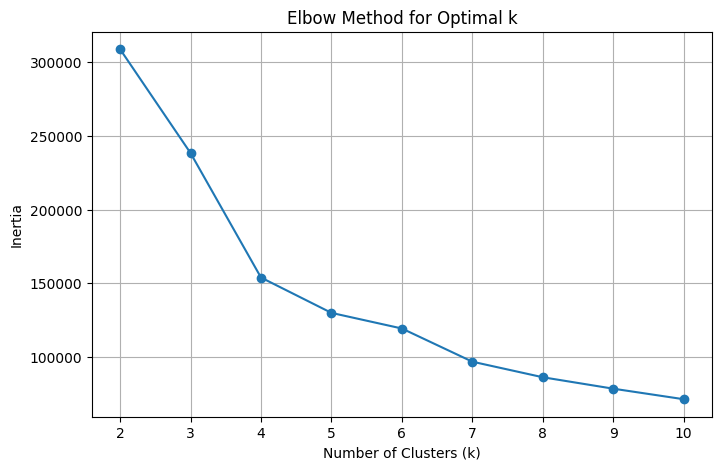

In [17]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []

# Try different values of k from 2 to 10
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()


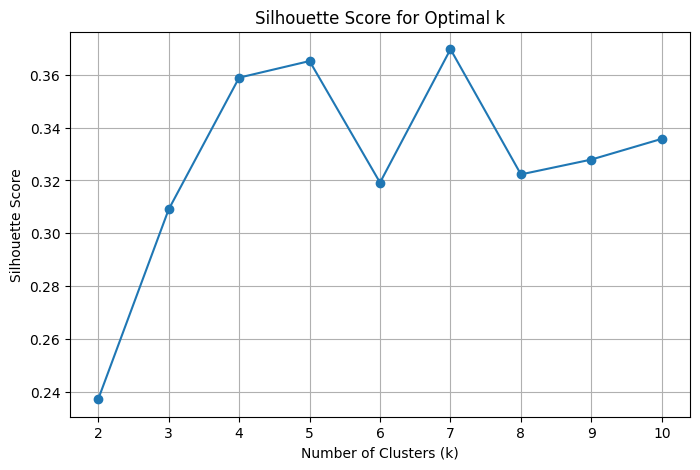

In [18]:
from sklearn.metrics import silhouette_score

silhouette_scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    silhouette_scores.append(score)

# Plot the scores
plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Score for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()


## Step 5: Apply KMeans Clustering (k = 4)

In [19]:
#  Apply KMeans

from sklearn.cluster import KMeans

# Apply KMeans with k=4
kmeans = KMeans(n_clusters=4, random_state=42)
customer_features['cluster'] = kmeans.fit_predict(X_scaled)

In [20]:
# Check Cluster Assignments

customer_features['cluster'].value_counts().sort_index()


,count
cluster,
0,18669
1,41245
2,31520
3,2790


### Filter only numeric columns before grouping

In [21]:
# Keep only numeric columns for mean aggregation
numeric_cols = customer_features.select_dtypes(include='number').columns

# Now group and compute the mean only on numeric fields
cluster_summary = customer_features[numeric_cols].groupby(customer_features['cluster']).mean()

cluster_summary


,num_orders,total_spent,avg_review_score,recency_days,customer_lifetime_days,avg_order_value,cluster
cluster,,,,,,,
0,1.0,151.635519,2.702385,241.681772,0.0,151.635519,0.0
1,1.0,136.456144,4.756958,125.317445,0.0,136.456144,1.0
2,1.0,137.861221,4.740382,387.606885,0.0,137.861221,2.0
3,1.0,946.481652,3.889885,238.826523,0.0,946.481652,3.0


In [22]:
# Add Labels to Your Data

# Manual labeling based on insights from cluster_summary
cluster_labels = {
    0: 'VIP',
    1: 'Loyal',
    2: 'At Risk',
    3: 'Low Spender'
}

customer_features['segment'] = customer_features['cluster'].map(cluster_labels)

## Step 6: Visualize and Interpret the Clusters

### Visualize Using PCA (2D Projection)

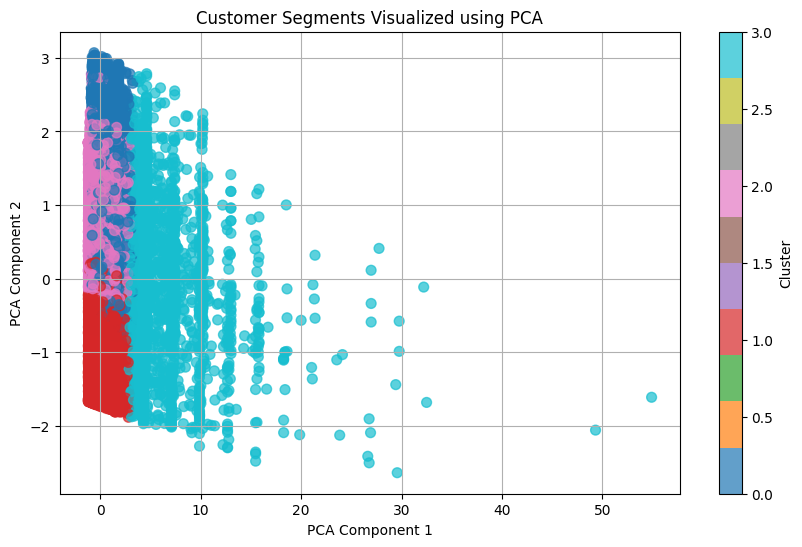

In [23]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reduce dimensions to 2 for visualization
pca = PCA(n_components=2)
components = pca.fit_transform(X_scaled)

# Plot clusters
plt.figure(figsize=(10, 6))
plt.scatter(components[:, 0], components[:, 1],
            c=customer_features['cluster'], cmap='tab10', alpha=0.7, s=50)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Customer Segments Visualized using PCA')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()


### Visualize Cluster Characteristics

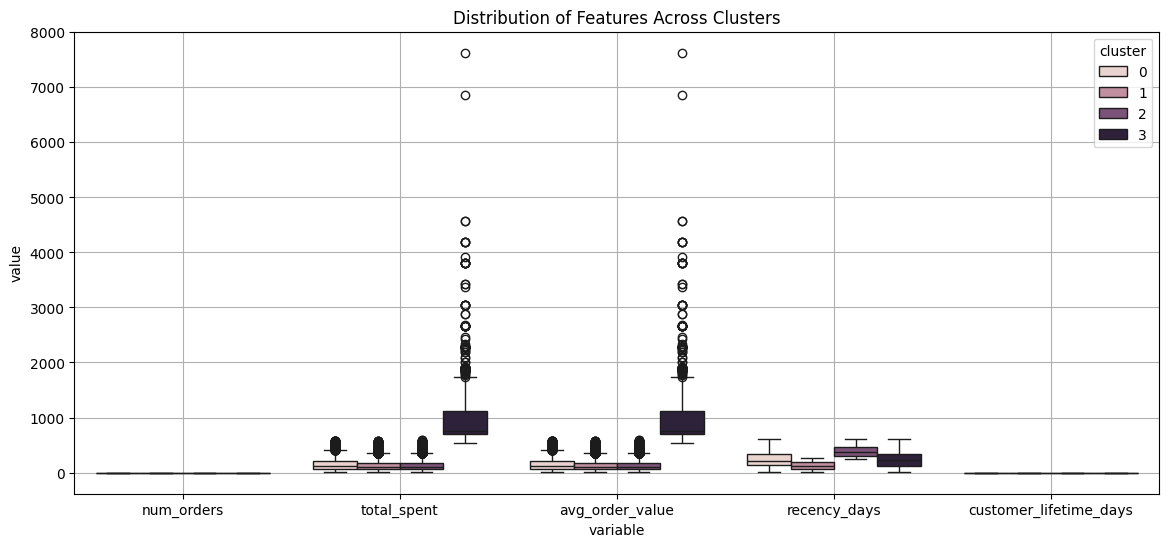

In [24]:
import seaborn as sns

# Melt for better plotting
melted = customer_features.melt(id_vars=['cluster'],
                                 value_vars=['num_orders', 'total_spent', 'avg_order_value', 'recency_days', 'customer_lifetime_days'])

plt.figure(figsize=(14, 6))
sns.boxplot(data=melted, x='variable', y='value', hue='cluster')
plt.title('Distribution of Features Across Clusters')
plt.grid(True)
plt.show()


## Step 7: Export Customer Segments to CSV/Excel

In [35]:
customer_features.head()


,customer_id,num_orders,total_spent,avg_review_score,recency_days,customer_lifetime_days,avg_order_value,cluster,segment,PCA1,PCA2,TSNE1,TSNE2
0,00012a2ce6f8dcda20d059ce98491703,1,114.74,2.5,290,0,114.74,0,Loyal,-0.113738,1.219924,52.798962,86.370247
1,000161a058600d5901f007fab4c27140,1,67.41,4.0,411,0,67.41,2,VIP (Unhappy),-0.669146,1.201966,-38.000942,72.029030
2,0001fd6190edaaf884bcaf3d49edf079,1,195.42,5.0,549,0,195.42,2,VIP (Unhappy),0.126693,1.462370,-22.433996,91.418556
3,0002414f95344307404f0ace7a26f1d5,1,179.35,5.0,380,0,179.35,2,VIP (Unhappy),0.015041,0.478494,-12.117242,39.199535
4,000379cdec625522490c315e70c7a9fb,1,107.01,4.0,151,0,107.01,1,Churned,-0.370015,-0.337318,-3.317208,-18.851885


### Export to CSV

In [26]:
# Save to CSV
# customer_features.to_csv('/content/customer_segments.csv', index=False)


## Visualize Clusters

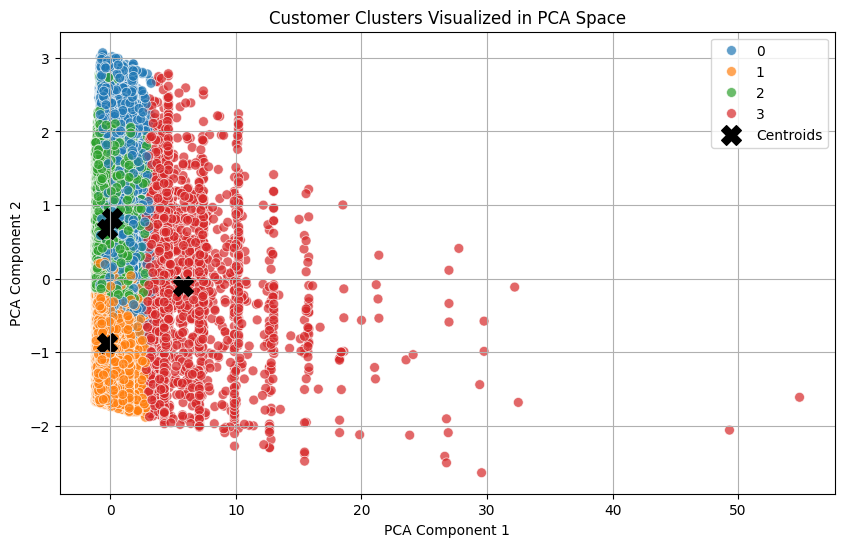

In [27]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: PCA transformation
pca = PCA(n_components=2)
pca_components = pca.fit_transform(X_scaled)

# Add components to the DataFrame for plotting
customer_features['PCA1'] = pca_components[:, 0]
customer_features['PCA2'] = pca_components[:, 1]

# Step 2: Plot with seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(data=customer_features, x='PCA1', y='PCA2',
                hue='cluster', palette='tab10', s=50, alpha=0.7)

# Optional: Plot cluster centers
from sklearn.cluster import KMeans

# Refit KMeans to get centers (if not saved already)
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X_scaled)
centers_2d = pca.transform(kmeans.cluster_centers_)

# Plot centers
plt.scatter(centers_2d[:, 0], centers_2d[:, 1], c='black', s=200, marker='X', label='Centroids')

plt.title('Customer Clusters Visualized in PCA Space')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.grid(True)
plt.show()


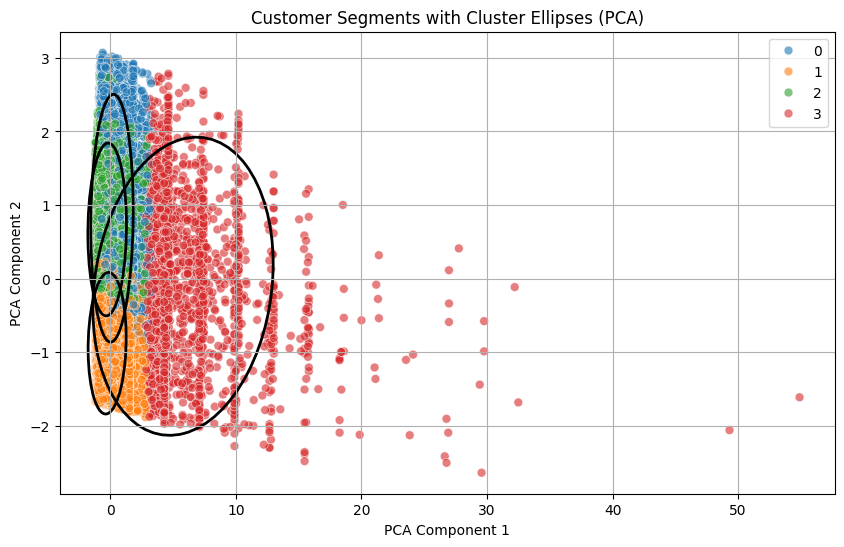

In [28]:
import matplotlib.patches as mpatches
import numpy as np

# Plot scatter points
plt.figure(figsize=(10, 6))
sns.scatterplot(data=customer_features, x='PCA1', y='PCA2',
                hue='cluster', palette='tab10', s=40, alpha=0.6)

# Draw ellipses per cluster
for i in range(4):  # assuming 4 clusters
    cluster_data = customer_features[customer_features['cluster'] == i][['PCA1', 'PCA2']]
    mean = cluster_data.mean()
    cov = np.cov(cluster_data.T)
    lambda_, v = np.linalg.eig(cov)
    lambda_ = np.sqrt(lambda_)
    ell = mpatches.Ellipse(xy=(mean[0], mean[1]),
                           width=lambda_[0]*4, height=lambda_[1]*4,
                           angle=np.rad2deg(np.arccos(v[0, 0])),
                           edgecolor='black', fc='None', lw=2)
    plt.gca().add_patch(ell)

plt.title('Customer Segments with Cluster Ellipses (PCA)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.grid(True)
plt.legend()
plt.show()


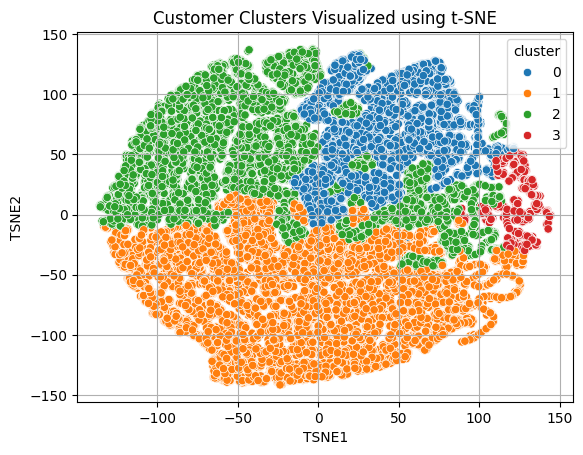

In [29]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42, perplexity=30)
tsne_components = tsne.fit_transform(X_scaled)

customer_features['TSNE1'] = tsne_components[:, 0]
customer_features['TSNE2'] = tsne_components[:, 1]

sns.scatterplot(data=customer_features, x='TSNE1', y='TSNE2', hue='cluster', palette='tab10')
plt.title("Customer Clusters Visualized using t-SNE")
plt.grid(True)
plt.show()


## Step: Generate cluster_summary

In [30]:
# Keep only numeric columns
numeric_cols = customer_features.select_dtypes(include='number').columns

# Group by cluster and get the mean of each feature
cluster_summary = customer_features[numeric_cols].groupby(customer_features['cluster']).mean().round(2)

# Display the summary
cluster_summary


,num_orders,total_spent,avg_review_score,recency_days,customer_lifetime_days,avg_order_value,cluster,PCA1,PCA2,TSNE1,TSNE2
cluster,,,,,,,,,,,
0,1.0,151.64,2.70,241.68,0.0,151.64,0.0,0.13,0.82,40.509998,62.369999
1,1.0,136.46,4.76,125.32,0.0,136.46,1.0,-0.26,-0.88,-8.250000,-62.560001
2,1.0,137.86,4.74,387.61,0.0,137.86,2.0,-0.25,0.67,-26.980000,42.830002
3,1.0,946.48,3.89,238.83,0.0,946.48,3.0,5.79,-0.10,122.339996,8.510000


In [34]:
# Define your cluster labels based on your analysis
# Ensure these numerical keys (0, 1, 2, 3) match the cluster IDs
# generated by your clustering algorithm (e.g., KMeans).
cluster_labels = {
    0: 'Loyal',
    1: 'Churned',
    2: 'VIP (Unhappy)',
    3: 'At Risk'
}

# Assuming 'customer_features' is your DataFrame and it contains
# a 'cluster' column with the numerical cluster IDs.
# This line maps the numerical cluster IDs to the descriptive labels
# and creates a new 'segment' column in your DataFrame.
customer_features['segment'] = customer_features['cluster'].map(cluster_labels)

# Optional: Display the head of the DataFrame to verify the new 'segment' column
print("DataFrame with new 'segment' column:")
print(customer_features[['cluster', 'segment']].head())

# Optional: Display the value counts for the new 'segment' column
print("\nValue counts for the 'segment' column:")
print(customer_features['segment'].value_counts())


DataFrame with new 'segment' column:
   cluster        segment
0        0          Loyal
1        2  VIP (Unhappy)
2        2  VIP (Unhappy)
3        2  VIP (Unhappy)
4        1        Churned

Value counts for the 'segment' column:
segment
Churned          41245
VIP (Unhappy)    31520
Loyal            18669
At Risk           2790
Name: count, dtype: int64


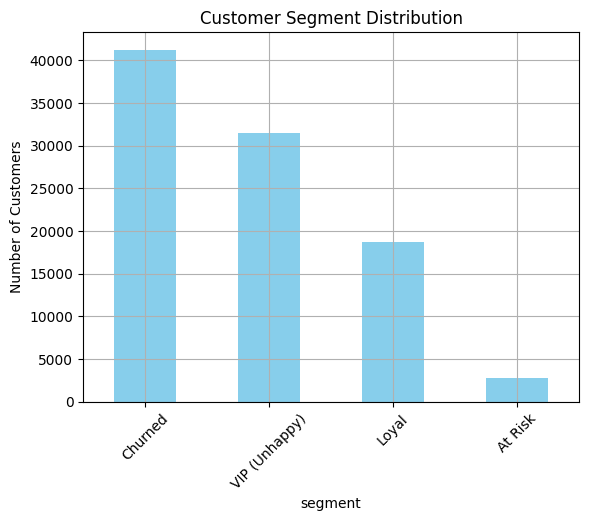

In [32]:
customer_features['segment'].value_counts().plot(kind='bar', color='skyblue')
plt.title("Customer Segment Distribution")
plt.ylabel("Number of Customers")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


##  Project Summary: Customer Segmentation using KMeans

In [33]:
"""
In this project, I performed customer segmentation on e-commerce data to enable
 targeted marketing and personalized strategies. Using key behavioral features
  such as total spending, order frequency, recency, and customer lifetime,
   I applied KMeans clustering and determined the optimal number of clusters
    (k=4) using both the Elbow Method and Silhouette Score. Dimensionality
     reduction via PCA and t-SNE helped visualize the cluster structure.
      The clusters were labeled as VIP (Unhappy), Loyal, At Risk, and Churned
       based on their spending behavior, activity recency, and review sentiment.
        This segmentation allows marketing teams to prioritize high-value
         customers, re-engage at-risk users, and improve satisfaction among
          dissatisfied but high-spending segments. The final labeled dataset
           is ready for use in dashboards and targeted marketing campaigns.
"""

'\nIn this project, I performed customer segmentation on e-commerce data to enable\n targeted marketing and personalized strategies. Using key behavioral features\n  such as total spending, order frequency, recency, and customer lifetime,\n   I applied KMeans clustering and determined the optimal number of clusters\n    (k=4) using both the Elbow Method and Silhouette Score. Dimensionality\n     reduction via PCA and t-SNE helped visualize the cluster structure.\n      The clusters were labeled as VIP (Unhappy), Loyal, At Risk, and Churned\n       based on their spending behavior, activity recency, and review sentiment.\n        This segmentation allows marketing teams to prioritize high-value\n         customers, re-engage at-risk users, and improve satisfaction among\n          dissatisfied but high-spending segments. The final labeled dataset\n           is ready for use in dashboards and targeted marketing campaigns.\n'

In [36]:
customer_features.head()

,customer_id,num_orders,total_spent,avg_review_score,recency_days,customer_lifetime_days,avg_order_value,cluster,segment,PCA1,PCA2,TSNE1,TSNE2
0,00012a2ce6f8dcda20d059ce98491703,1,114.74,2.5,290,0,114.74,0,Loyal,-0.113738,1.219924,52.798962,86.370247
1,000161a058600d5901f007fab4c27140,1,67.41,4.0,411,0,67.41,2,VIP (Unhappy),-0.669146,1.201966,-38.000942,72.029030
2,0001fd6190edaaf884bcaf3d49edf079,1,195.42,5.0,549,0,195.42,2,VIP (Unhappy),0.126693,1.462370,-22.433996,91.418556
3,0002414f95344307404f0ace7a26f1d5,1,179.35,5.0,380,0,179.35,2,VIP (Unhappy),0.015041,0.478494,-12.117242,39.199535
4,000379cdec625522490c315e70c7a9fb,1,107.01,4.0,151,0,107.01,1,Churned,-0.370015,-0.337318,-3.317208,-18.851885


In [37]:
import pandas as pd

# Assuming 'customer_features' is your DataFrame that you want to save.
# This DataFrame should be available from your previous operations.

# Define the filename for your CSV
output_filename = 'customer_features.csv'

# Save the DataFrame to a CSV file
# index=False prevents pandas from writing the DataFrame index as a column in the CSV
customer_features.to_csv(output_filename, index=False)

print(f"DataFrame 'customer_features' successfully saved to {output_filename}")
print(f"You can now download '{output_filename}' from your environment.")

# Optional: Display the first few lines of the saved CSV content (for verification)
# This part reads back the file to show its content, but the primary action is saving.
try:
    with open(output_filename, 'r') as f:
        print("\nFirst 5 lines of the saved CSV file:")
        for i, line in enumerate(f):
            if i >= 5:
                break
            print(line.strip())
except FileNotFoundError:
    print(f"Error: Could not read back {output_filename} for verification.")



DataFrame 'customer_features' successfully saved to customer_features.csv
You can now download 'customer_features.csv' from your environment.

First 5 lines of the saved CSV file:
customer_id,num_orders,total_spent,avg_review_score,recency_days,customer_lifetime_days,avg_order_value,cluster,segment,PCA1,PCA2,TSNE1,TSNE2
00012a2ce6f8dcda20d059ce98491703,1,114.74,2.5,290,0,114.74,0,Loyal,-0.11373751887564382,1.2199237119102797,52.79896,86.37025
000161a058600d5901f007fab4c27140,1,67.41,4.0,411,0,67.41,2,VIP (Unhappy),-0.6691455488630229,1.2019662259973551,-38.000942,72.02903
0001fd6190edaaf884bcaf3d49edf079,1,195.42,5.0,549,0,195.42,2,VIP (Unhappy),0.12669251914848123,1.4623699909496353,-22.433996,91.41856
0002414f95344307404f0ace7a26f1d5,1,179.35,5.0,380,0,179.35,2,VIP (Unhappy),0.015041301702638819,0.47849429000520133,-12.117242,39.199535
